In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('max_colwidth', 200)

https://osmihelp.org/research/

In [4]:
df_2014.columns = df_2014.columns.str.lower().str.strip()
df_2014.columns

Index(['timestamp', 'age', 'gender', 'country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [59]:
for c in df_2014.columns:
    print()
    print(c)
    print(df_2014[c].value_counts(dropna=False))


timestamp
2014-08-27 12:54:11    2
2014-08-27 15:23:51    2
2014-08-27 15:55:07    2
2014-08-28 16:58:33    2
2014-08-27 12:43:28    2
2014-08-27 12:31:41    2
2014-08-27 15:24:47    2
2014-08-27 14:22:43    2
2014-08-27 12:44:51    2
2014-08-27 17:33:52    2
2014-08-28 16:52:34    2
2014-08-27 12:37:50    2
2014-08-28 09:59:39    2
2014-08-29 05:47:19    1
2014-08-29 17:04:07    1
2014-08-28 09:16:21    1
2014-10-02 21:25:16    1
2014-08-27 13:02:14    1
2014-08-27 12:51:55    1
2014-08-27 15:22:26    1
2014-09-01 10:06:14    1
2014-08-27 20:53:22    1
2014-08-28 15:50:44    1
2014-08-28 18:21:23    1
2014-08-27 11:57:30    1
2014-08-28 18:21:58    1
2014-08-27 14:24:15    1
2014-08-27 16:35:02    1
2014-08-27 21:39:23    1
2014-08-27 12:48:29    1
                      ..
2014-08-29 11:20:13    1
2014-08-29 12:48:20    1
2015-02-21 09:30:14    1
2014-08-27 14:37:35    1
2014-08-28 04:09:14    1
2014-08-28 06:30:18    1
2014-08-28 03:16:53    1
2014-10-05 21:16:10    1
2014-08-27 11:

In [69]:
df_legenda.loc['tech_company']

meaning     Is your employer primarily a tech company/organization?
Name: tech_company, dtype: object

* tem timestamps repetidos - CONFERIDO: PESSOAS RESPONDERAM NO MESMO HORARIO
* tem valores errados na age - ELIMINADO
* o gender tá bem zoado, dá pra fazer uma coluna de outros (GLBT e tal) - FEITO
* na work_interfere tem não doentes que responderam se interfere ou não - JÁ ANALISEI
* Apresentar exemplos dos comentários
* Tem NaN nos state e no work_interfere

In [ ]:
# Fiz uma legenda para a tabela 2014:

# df_legenda = pd.read_clipboard(':', header=None)
# df_legenda = df_legenda.drop('Unnamed: 0', axis=1)
# df_legenda.columns = ['var', 'meaning']
# df_legenda.reindex = 'var'
# df_legenda.index = df_legenda.index.str.strip()

# df_legenda.to_csv('legend_survey.csv')

df_legenda = pd.read_csv('legend_survey.csv', index_col='var')
df_legenda

In [84]:
# CLEANING RAW DATA:
df_2014 = pd.read_csv('survey_2014.csv')

# Conferindo TS duplicados
ts_dup = df_2014.duplicated(subset='timestamp', keep=False)
df_2014[ts_dup]

# dropping wrong age values
a = list(df_2014[df_2014.age > 90].index)
b = (list(df_2014[df_2014.age < 15].index))
c = a + b
c
df_2014 = df_2014.drop(c)

# organizing gender column
df_2014.gender = df_2014.gender.str.lower().str.strip()
df_2014.gender.value_counts()

m = ['Male', 'male', 'M', 'm', 'Cis Male', 'Man', 'ostensibly male, unsure what that really means', 'Mail', 'Make', 
     'Male (CIS)', 'cis male', 'maile', 'Malr', 'Cis Man', 'Mal', 'msle']
     
f = ['Female', 'female', 'F', 'f', 'Woman', 'Femake', 'Female (cis)', 'Cis Female', 'woman', 'femail', 
     'cis-female/femme']
df_2014.gender.replace(m, 'm', inplace=True)
df_2014.gender.replace(f, 'f', inplace=True)

o = list(df_2014.gender.value_counts().index)[2:]
df_2014.gender.replace(o, 'o', inplace=True)

# making continent column
continents = pd.read_csv('continents.csv', usecols=['Name', 'continent'], index_col='Name', squeeze=True)
df = df.assign(continent = df.country)
df.continent = df.continent.map(continents)

# df_2014_cleaned.to_csv('2014_cleaned_1.csv') * DEIXEI COMENTADO PARA NÃO GRAVAR EM CIMA *

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
116,2014-08-27 12:31:41,21,Male,United Kingdom,NaN,Yes,No,No,Often,1-5,...,Very difficult,Yes,No,Some of them,Yes,No,Maybe,No,No,NaN
117,2014-08-27 12:31:41,27,Male,Canada,NaN,No,No,No,Rarely,6-25,...,Very easy,Maybe,No,Some of them,Yes,No,No,Don't know,No,NaN
138,2014-08-27 12:37:50,29,Female,United States,MD,No,No,No,NaN,6-25,...,Somewhat easy,Maybe,No,Some of them,No,No,No,Don't know,No,NaN
139,2014-08-27 12:37:50,22,m,Austria,NaN,No,No,No,NaN,6-25,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
157,2014-08-27 12:43:28,26,male,United States,OK,No,No,No,Often,26-100,...,Don't know,Yes,Maybe,Some of them,Yes,No,Maybe,No,No,NaN
158,2014-08-27 12:43:28,27,male,United States,UT,No,No,Yes,Rarely,26-100,...,Somewhat difficult,Maybe,No,Some of them,Yes,No,No,Don't know,Yes,Had a co-worker disappear from work for a few weeks and then come back to let everyone know he was bipolar. His responsibilities and schedule were adjusted to accommodate but he got worse didn't s...
161,2014-08-27 12:44:51,25,F,United States,NY,No,Yes,Yes,Sometimes,500-1000,...,Don't know,Yes,Yes,Some of them,Some of them,No,No,Don't know,No,NaN
162,2014-08-27 12:44:51,31,M,United States,CA,No,No,No,Never,More than 1000,...,Don't know,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
192,2014-08-27 12:54:11,28,Male,Russia,NaN,No,No,No,Sometimes,26-100,...,Don't know,Yes,Maybe,No,No,No,Maybe,Don't know,No,NaN
193,2014-08-27 12:54:11,35,Male,United States,CA,No,No,Yes,Rarely,6-25,...,Don't know,No,No,Some of them,Yes,No,No,Don't know,No,NaN


In [180]:
# working with cleaned data:

df = pd.read_csv('2014_cleaned.csv', parse_dates=True, index_col='timestamp')
df_legenda = pd.read_csv('legend_survey.csv', index_col='var')

In [181]:
df.columns.sort_values()

Index(['age', 'anonymity', 'benefits', 'care_options', 'comments', 'continent',
       'country', 'coworkers', 'family_history', 'gender', 'leave',
       'mental_health_consequence', 'mental_health_interview',
       'mental_vs_physical', 'no_employees', 'obs_consequence',
       'phys_health_consequence', 'phys_health_interview', 'remote_work',
       'seek_help', 'self_employed', 'state', 'supervisor', 'tech_company',
       'treatment', 'wellness_program', 'work_interfere'],
      dtype='object')

In [182]:
df.head()

timestamp
2014-08-27 11:29:31    North America
2014-08-27 11:29:37    North America
2014-08-27 11:29:44    North America
2014-08-27 11:29:46           Europe
2014-08-27 11:30:22    North America
Name: continent, dtype: object

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1251 entries, 2014-08-27 11:29:31 to 2016-02-01 23:04:31
Data columns (total 27 columns):
age                          1251 non-null int64
gender                       1251 non-null object
country                      1251 non-null object
state                        738 non-null object
self_employed                1233 non-null object
family_history               1251 non-null object
treatment                    1251 non-null object
work_interfere               989 non-null object
no_employees                 1251 non-null object
remote_work                  1251 non-null object
tech_company                 1251 non-null object
benefits                     1251 non-null object
care_options                 1251 non-null object
wellness_program             1251 non-null object
seek_help                    1251 non-null object
anonymity                    1251 non-null object
leave                        1251 non-null object
mental_hea

In [214]:
comm = pd.Series(index=df.columns)
comm.fillna('***', inplace=True)

comm['age'] = '''A maioria dos que responderam à pesquisa está entre 20 e 40 anos. Em um primeiro momento não parece 
haver diferenças de idade entre os que procuram e os que não procuram tto.'''
comm.gender = '''A maioria dos que responderam são homens, na categoria "o" estão os que se denominaram homossexuais, 
transexuais, etc. Entre os homens, a maioria não procurou tto psiq, entre as mulheres e os outros, 
a maioria procurou.'''
comm.self_employed = '''A maioria não tem negócio próprio. 
Não parece haver diferença na busca de tto.'''
comm.family_history = '''A maioria não tem história familiar de doença mental.
A maioria dos que procuraram tto tem história familiar.'''
comm.treatment = '''Metade dos que responderam à pesquisa já procuraram tratamento para alguma doença mental.'''
comm.work_interfere = '''
A maioria entre todos e a maioria dos que procuraram tratamento acham que atrapalha o desempenho do trabalho 
algumas vezes.
A maioria dos não procuraram tratamento acha que uma doença mental nunca atrapalha o trabalho.
'''
comm.no_employees = '''
Não parece haver relação entre o número de empregados da empresa com a busca de tratamento psiquiátrico.
'''
comm.remote_work = '''
A maioria não trabalha remoto e não parece ter relação com a busca de tto psiquiátrico.
'''
comm.tech_company = '''
Parece não ter relação com tratamento psiq.'''
comm.benefits = '''
A maioria das empresas tem algum programa de benefícios.
A maioria dos que procuraram ajuda estão em empresas que oferecem.
Será que a empresa começou a oferecer por causa da alta incidência de doenças mentais ou caso tenha tratamento 
mais disponível leva as pessoas a procurarem mais?'''
comm.care_options = '''
Embora a maioria das empresas ofereçam, a maioria dos que responderam à pesquisa não sabem quais 
as opções de benefícios oferecidos.
A maioria dos que sabem, é composta justamente pelos que procuraram tratamento.'''
comm.wellness_program = '''
A maioria das empresas não abordam saude mental em seus programas de bem estar.'''
comm.seek_help = '''
E não oferecem opções para ajudar a encontrar tratamento.'''
comm.anonymity = '''
A maioria sequer sabe se sua identidade seria preservada, inclusive entre os que procuraram tratamento.
Provavelmente eles não contaram para ninguém em seu ambiente de trabalho.'''
comm.leave = '''
A maioria não sabe se seria fácil sair do trabalho para tratamento psiquiátrico, 
inclusive entre os que buscaram tratamento.'''
comm.mental_health_consequence = '''
A maioria dos que buscaram tratamento acham que talvez tenham consequencias ruins para seu trabalho.
Entre os que não buscaram tratamento, a maioria acha que não haveria consequências.'''
comm.phys_health_consequence = '''
Quando a pergunta foi sobre doenças físicas, a maioria em ambos os grupos acha que não haveriam consequências.'''
comm.coworkers = '''
A maioria discutiria com alguns dos colegas sobre seu problema psiquiátrico.'''
comm.supervisor = '''
E com os supervisores, a maioria conversaria.
Embora uma grande parte não discutiria sobre isso com eles.'''
comm.mental_health_interview = '''
A imentsa maioria não abordaria suas doenças mentais em uma entrevista de emprego.'''
comm.phys_health_interview = '''
Quando o problema é físico, a maioria talvez abordasse, embora muitos também não falariam sobre isso.'''
comm.mental_vs_physical = '''
A maioria não sabe se seu empregar faz distinção entre doença física e psiquiátrica.'''
comm.obs_consequence = '''
A maioria não observou consequencias negativas.
Mas o grupo que observou mais consequências negativas foi justamente entre os que buscaram tratamento.'''


age                          ***
gender                       ***
country                      ***
state                        ***
self_employed                ***
family_history               ***
treatment                    ***
work_interfere               ***
no_employees                 ***
remote_work                  ***
tech_company                 ***
benefits                     ***
care_options                 ***
wellness_program             ***
seek_help                    ***
anonymity                    ***
leave                        ***
mental_health_consequence    ***
phys_health_consequence      ***
coworkers                    ***
supervisor                   ***
mental_health_interview      ***
phys_health_interview        ***
mental_vs_physical           ***
obs_consequence              ***
comments                     ***
continent                    ***
dtype: object

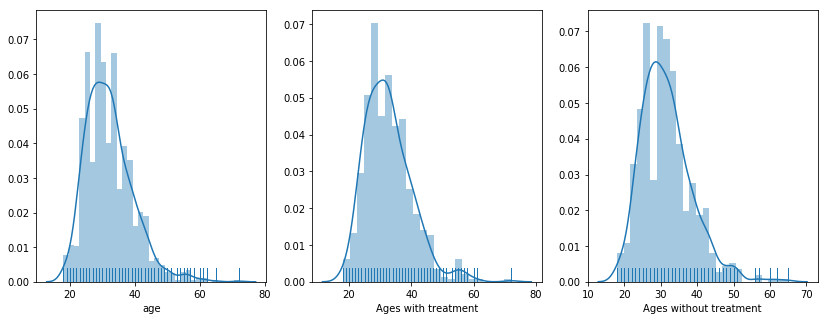

A maioria dos que responderam à pesquisa está entre 20 e 40 anos. Em um primeiro momento não parece 
haver diferenças de idade entre os que procuram e os que não procuram tto.



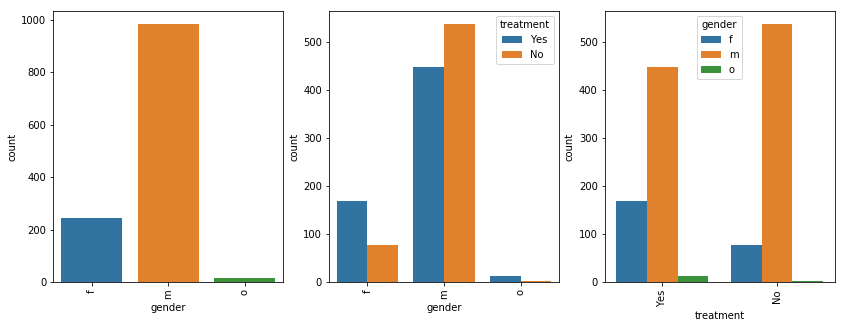

A maioria dos que responderam são homens, na categoria "o" estão os que se denominaram homossexuais, 
transexuais, etc. Entre os homens, a maioria não procurou tto psiq, entre as mulheres e os outros, 
a maioria procurou.

 Are you self-employed?


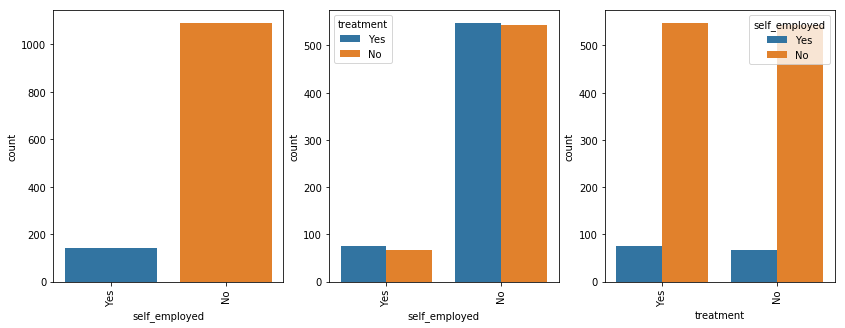

A maioria não tem negócio próprio. 
Não parece haver diferença na busca de tto.

 Do you have a family history of mental illness?


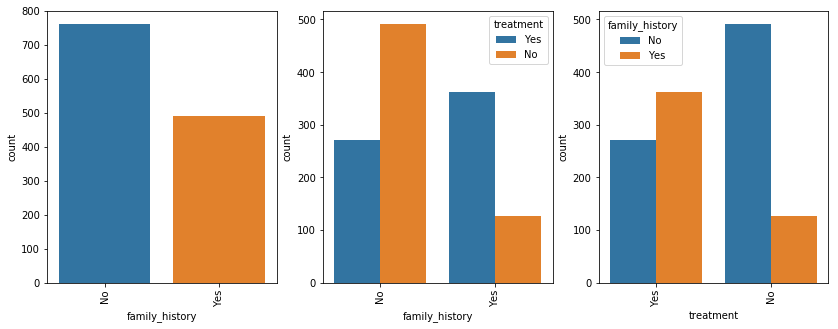

A maioria não tem história familiar de doença mental.
A maioria dos que procuraram tto tem história familiar.

 Have you sought treatment for a mental health condition?


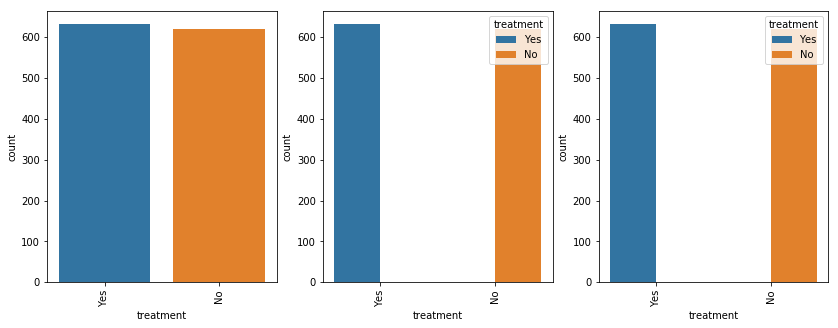

Metade dos que responderam à pesquisa já procuraram tratamento para alguma doença mental.

 If you have a mental health condition, do you feel that it interferes with your work?


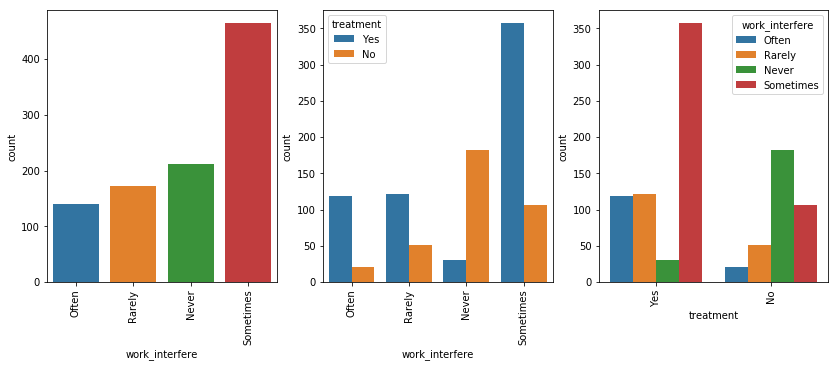


A maioria entre todos e a maioria dos que procuraram tratamento acham que atrapalha o desempenho do trabalho 
algumas vezes.
A maioria dos não procuraram tratamento acha que uma doença mental nunca atrapalha o trabalho.


 How many employees does your company or organization have?


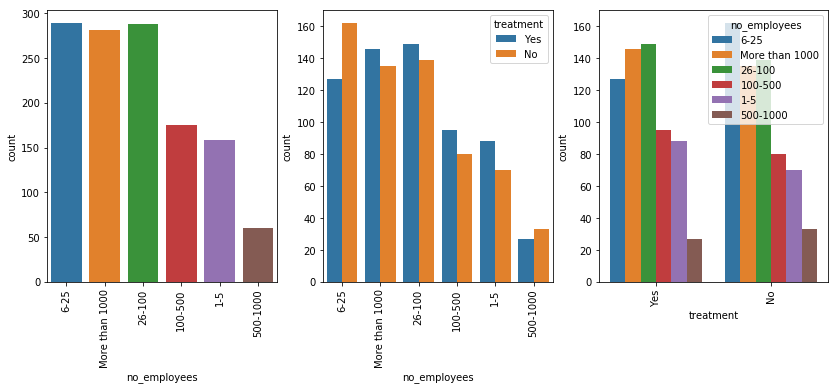


Não parece haver relação entre o número de empregados da empresa com a busca de tratamento psiquiátrico.


 Do you work remotely (outside of an office) at least 50% of the time?


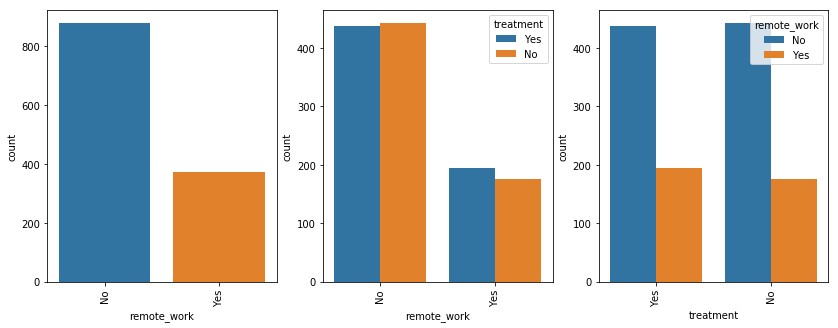


A maioria não trabalha remoto e não parece ter relação com a busca de tto psiquiátrico.


 Is your employer primarily a tech company/organization?


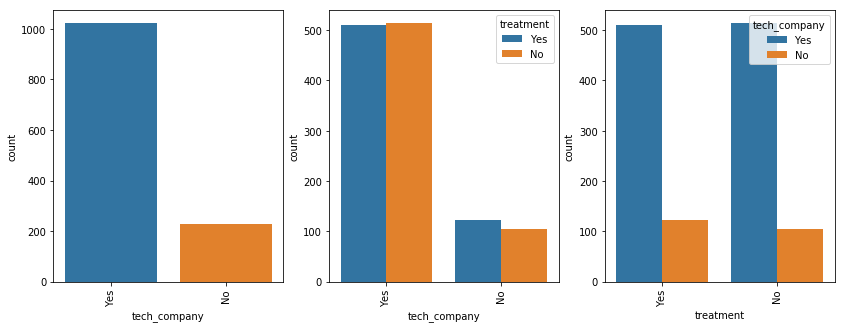


Parece não ter relação com tratamento psiq.

 Does your employer provide mental health benefits?


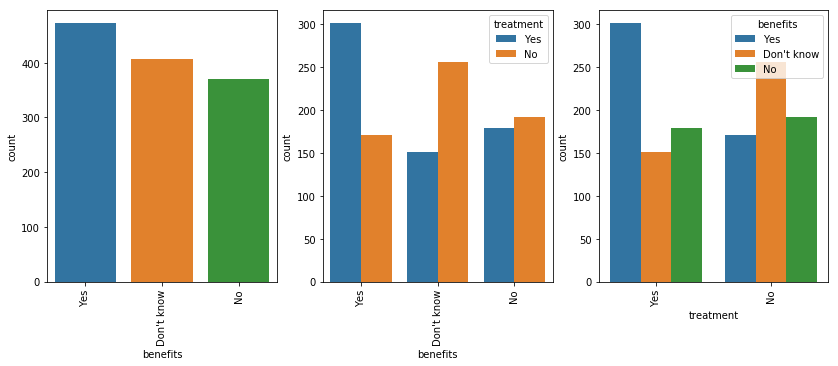


A maioria das empresas tem algum programa de benefícios.
A maioria dos que procuraram ajuda estão em empresas que oferecem.
Será que a empresa começou a oferecer por causa da alta incidência de doenças mentais ou caso tenha tratamento 
mais disponível leva as pessoas a procurarem mais?

 Do you know the options for mental health care your employer provides?


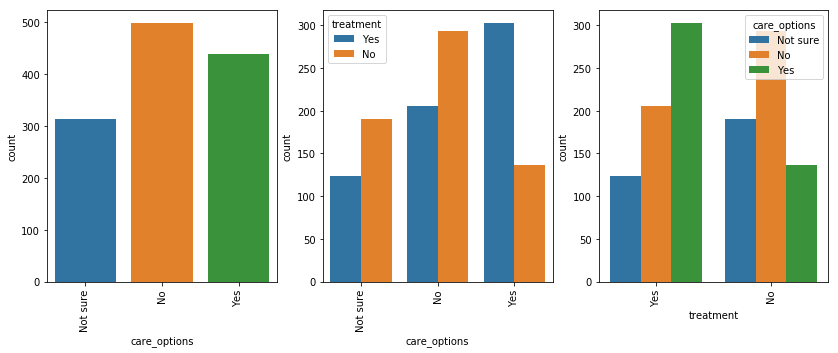


Embora a maioria das empresas ofereçam, a maioria dos que responderam à pesquisa não sabem quais 
as opções de benefícios oferecidos.
A maioria dos que sabem, é composta justamente pelos que procuraram tratamento.

 Has your employer ever discussed mental health as part of an employee wellness program?


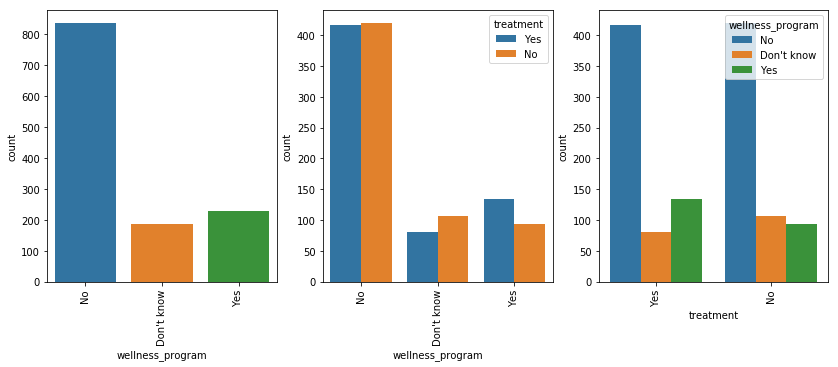


A maioria das empresas não abordam saude mental em seus programas de bem estar.

 Does your employer provide resources to learn more about mental health issues and how to seek help?


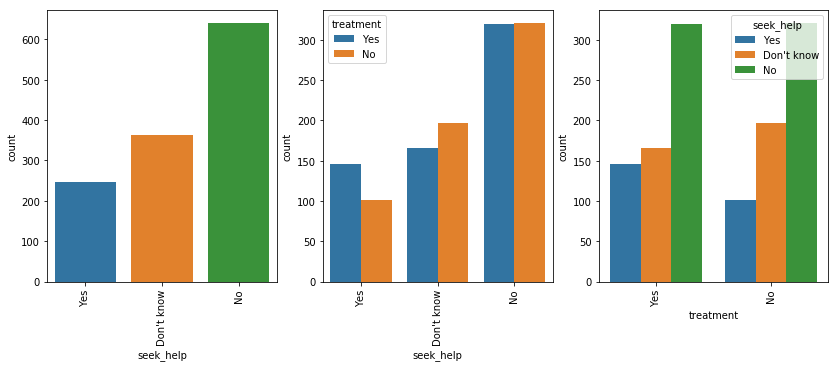


E não oferecem opções para ajudar a encontrar tratamento.

 Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?


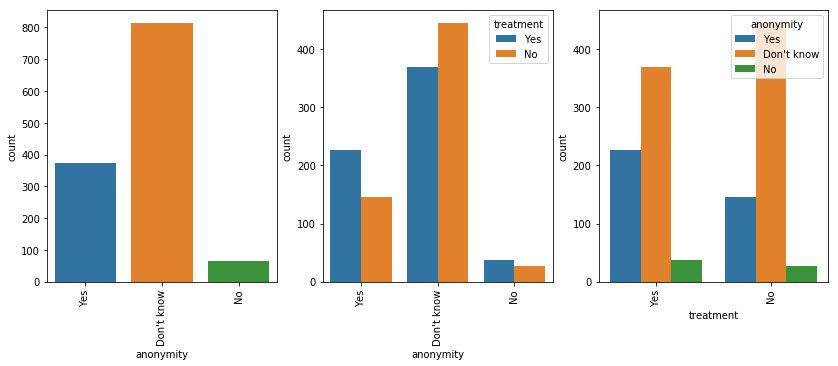


A maioria sequer sabe se sua identidade seria preservada, inclusive entre os que procuraram tratamento.
Provavelmente eles não contaram para ninguém em seu ambiente de trabalho.

 How easy is it for you to take medical leave for a mental health condition?


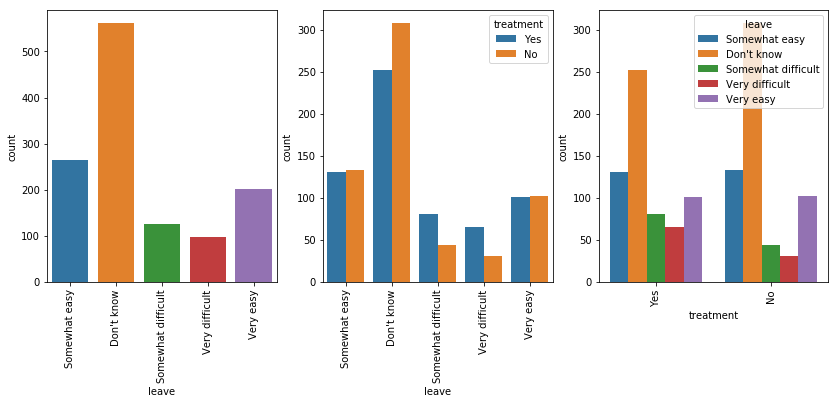


A maioria não sabe se seria fácil sair do trabalho para tratamento psiquiátrico, 
inclusive entre os que buscaram tratamento.

 Do you think that discussing a mental health issue with your employer would have negative consequences?


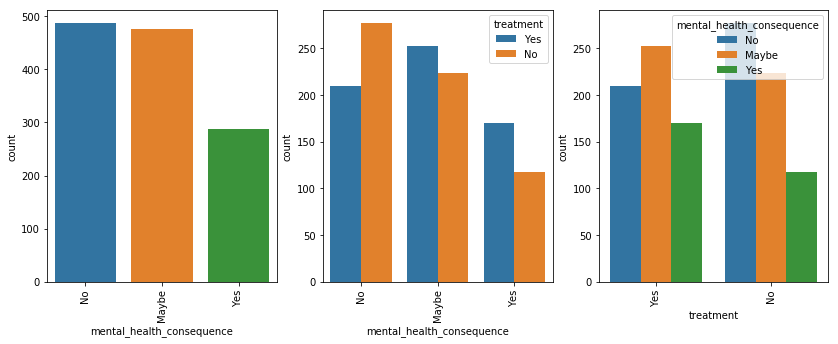


A maioria dos que buscaram tratamento acham que talvez tenham consequencias ruins para seu trabalho.
Entre os que não buscaram tratamento, a maioria acha que não haveria consequências.

 Do you think that discussing a physical health issue with your employer would have negative consequences?


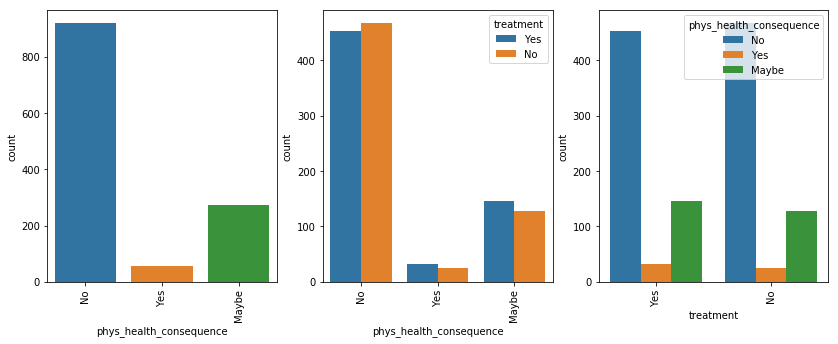


Quando a pergunta foi sobre doenças físicas, a maioria em ambos os grupos acha que não haveriam consequências.

 Would you be willing to discuss a mental health issue with your coworkers?


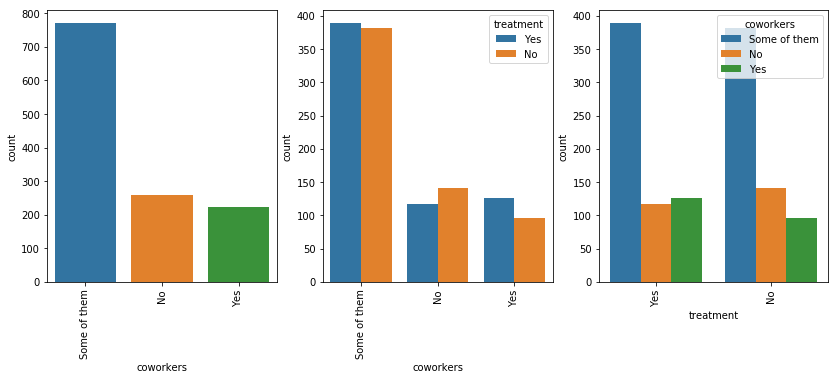


A maioria discutiria com alguns dos colegas sobre seu problema psiquiátrico.

 Would you be willing to discuss a mental health issue with your direct supervisor(s)?


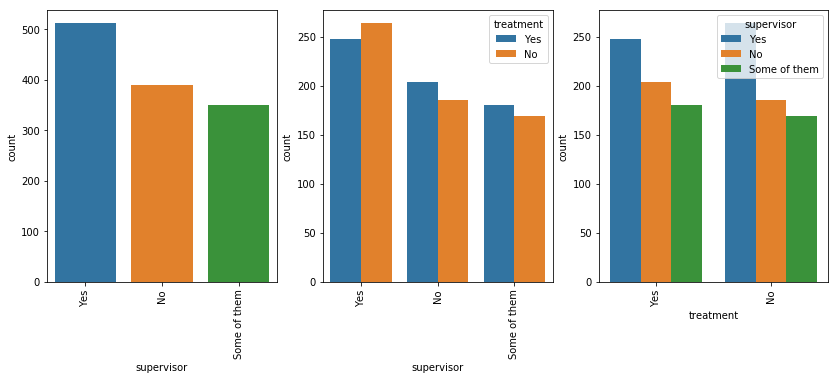


E com os supervisores, a maioria conversaria.
Embora uma grande parte não discutiria sobre isso com eles.

 Would you bring up a mental health issue with a potential employer in an interview?


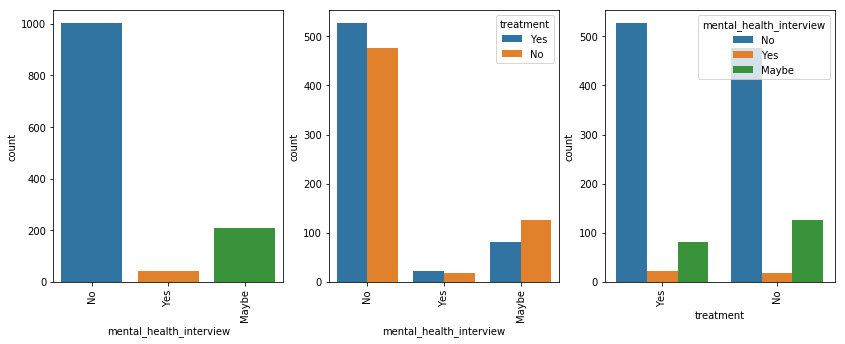


A imentsa maioria não abordaria suas doenças mentais em uma entrevista de emprego.

 Would you bring up a physical health issue with a potential employer in an interview?


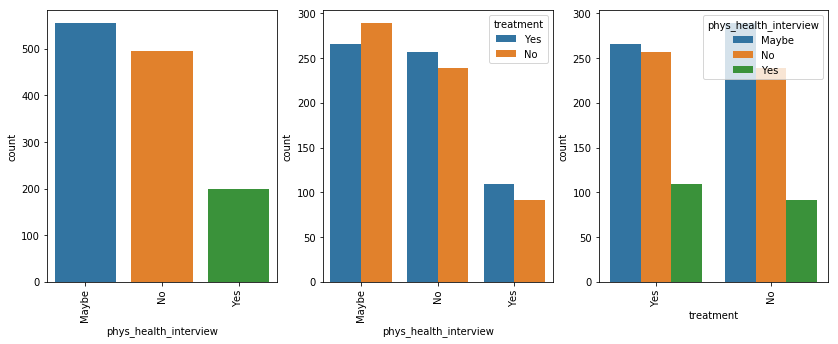


Quando o problema é físico, a maioria talvez abordasse, embora muitos também não falariam sobre isso.

 Do you feel that your employer takes mental health as seriously as physical health?


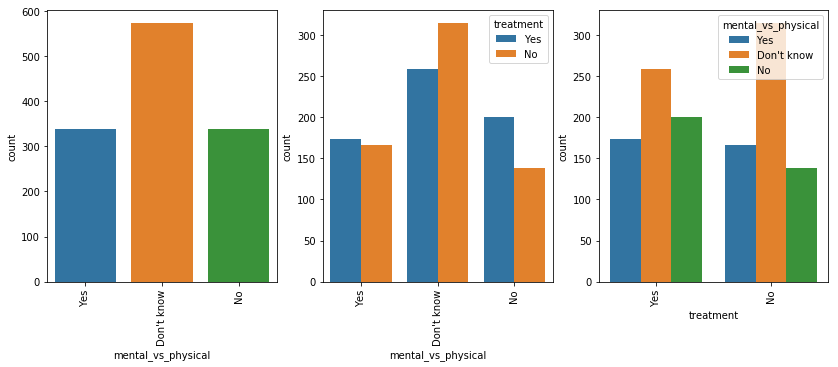


A maioria não sabe se seu empregar faz distinção entre doença física e psiquiátrica.

 Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?


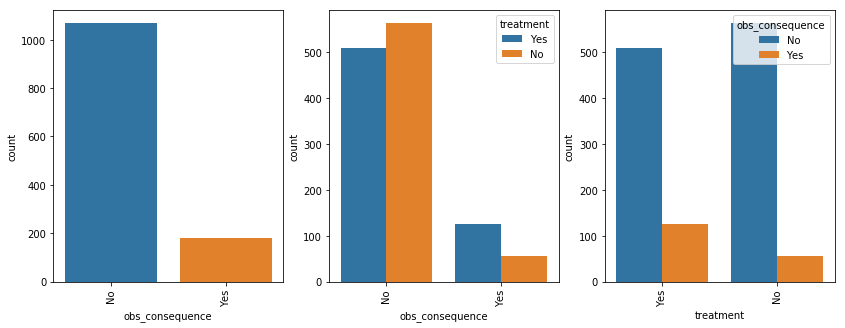


A maioria não observou consequencias negativas.
Mas o grupo que observou mais consequências negativas foi justamente entre os que buscaram tratamento.


In [248]:
for c in df.columns:
    if c in ['age']:
        plt.figure(figsize=(14, 5))
        plt.subplot(131)
        sns.distplot(df[c], rug=True)
        plt.subplot(132)
        sns.distplot(df[c][df.treatment == 'Yes'], rug=True, axlabel='Ages with treatment')
        plt.subplot(133)
        sns.distplot(df[c][df.treatment == 'No'], rug=True, axlabel='Ages without treatment')
        plt.show()
        print (comm[c])
    elif c in ['state', 'comments', 'country', 'continent']:
        pass
    else:
        print()
        plt.figure(figsize=(14, 5))
        if c not in ['age', 'gender']:
            print(''.join(df_legenda.loc[c].values))
        plt.subplot(132)
        sns.countplot(x=c, data=df, hue='treatment')
        plt.xticks(rotation=90)
        plt.subplot(131)
        sns.countplot(x=c, data=df)
        plt.xticks(rotation=90)
        plt.subplot(133)
        sns.countplot(x='treatment', data=df, hue=c)
        plt.xticks(rotation=90)
        plt.show()
        print (comm.loc[c])

In [250]:
# Making the ML
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

df_ml = pd.get_dummies(df.drop('comments', axis=1), drop_first=True)
X = df_ml.drop('treatment_Yes', axis=1)
y = df_ml.treatment_Yes

rf = RandomForestClassifier()
score = cross_val_score(rf, X, y)

In [251]:
print(score.mean())

0.735345455693


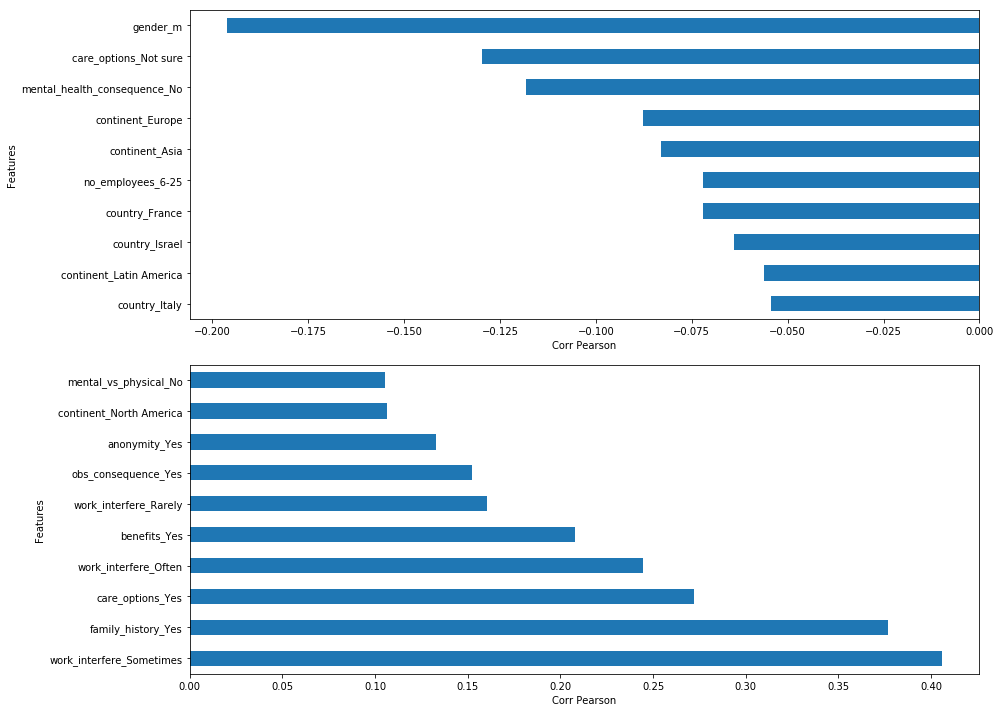


O gênero masculino parece estar negativamente relacionado à busca de tratamento psiquiátrico.
Em menor grau, estar no continente europeu, asiático e américa latina 
(Menos opções de tto ou melhores condições de vida?).

História familiar parece ser o fator mais importante, e estar na América do Norte também.



In [276]:
# Fazer uma correlação de Pearson

corr = df_ml.corr().treatment_Yes.sort_values()[:-1]


plt.figure(figsize=(14, 10))
plt.title('Correlação Pearson')
plt.subplot(211)
corr.head(10).sort_values(ascending=False).plot(kind='barh')
plt.xlabel('Corr Pearson')
plt.ylabel('Features')
plt.subplot(212)
corr.tail(10).sort_values(ascending=False).plot(kind='barh')
plt.xlabel('Corr Pearson')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

print('''
O gênero masculino parece estar negativamente relacionado à busca de tratamento psiquiátrico.
Em menor grau, estar no continente europeu, asiático e américa latina 
(Menos opções de tto ou melhores condições de vida?).

História familiar parece ser o fator mais importante, e estar na América do Norte também.
''')

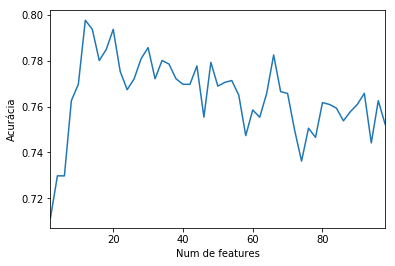

O melhor número de features é 12 com 0.80 de acurácia.


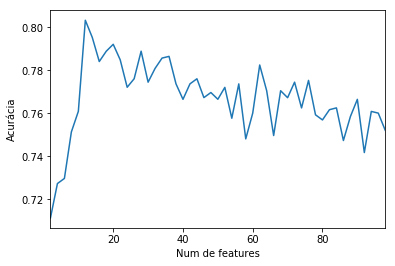

O melhor número de features é 12 com 0.80 de acurácia.


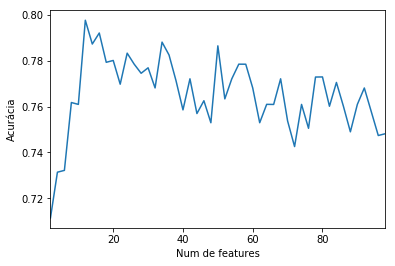

O melhor número de features é 12 com 0.80 de acurácia.


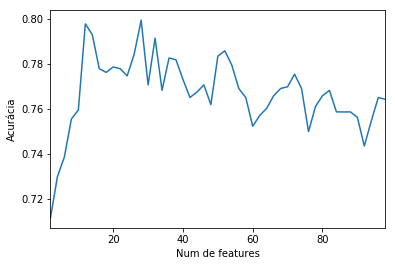

O melhor número de features é 28 com 0.80 de acurácia.


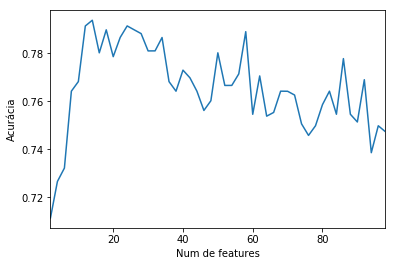

O melhor número de features é 14 com 0.79 de acurácia.


In [319]:
# Refazer o Random Forest usando somente as features mais importantes:

for g in range(5):
    scores = {}
    for n in range(1, 50):
        X = (
            df_ml
            .drop('treatment_Yes', axis=1)
            .loc[:,list(corr.head(n).index) + list(corr.tail(n).index)]
        )
        y = df_ml.treatment_Yes

        rf = RandomForestClassifier()
        score = cross_val_score(rf, X, y)
        scores[n * 2] = score.mean()

    #     print()
    #     print('Usando {} features:'.format(n * 2))
    #     print(score.mean())

    pd.Series(scores).plot()
    plt.xlabel('Num de features')
    plt.ylabel('Acurácia')
    plt.show()
    print('O melhor número de features é {} com {:.2f} de acurácia.'
          .format(max(scores, key=scores.get), scores[max(scores, key=scores.get)]))

In [320]:
df_legenda

,meaning
var,
state,"If you live in the United States, which state or territory do you live in?"
self_employed,Are you self-employed?
family_history,Do you have a family history of mental illness?
treatment,Have you sought treatment for a mental health condition?
work_interfere,"If you have a mental health condition, do you feel that it interferes with your work?"
no_employees,How many employees does your company or organization have?
remote_work,Do you work remotely (outside of an office) at least 50% of the time?
tech_company,Is your employer primarily a tech company/organization?
benefits,Does your employer provide mental health benefits?


In [321]:
df.columns

Index(['age', 'gender', 'country', 'state', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments', 'continent'],
      dtype='object')